In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
mnist_train=dset.MNIST("",train=True,transform=transforms.ToTensor(),target_transform=None,download=True)
mnist_test=dset.MNIST("",train=False,transform=transforms.ToTensor(),target_transform=None,download=True)

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


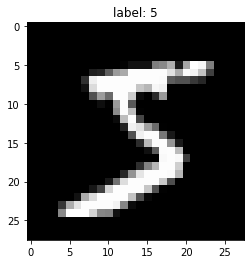

In [5]:
print("mnist_train 길이:", len(mnist_train))
print("mnist_test 길이:", len(mnist_test))

#데이터 하나 형태
image, label = mnist_train.__getitem__(0) #0번째 데이터
print("image data 형태:", image.size())
print("label: ",label)

# 그리기
img = image.numpy() #image 타입을 numpy로 변환 (1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [6]:
#hyper parameters
batch_size = 1024
learning_rate = 0.01 # 0.1, 0.01, 0.001 ...
num_epoch = 400

In [9]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                          batch_size=batch_size, 
                                           shuffle=True, num_workers=2,
                                           drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,
                                         shuffle=False,num_workers=2,
                                         drop_last=True)

[0]
한 번에 로드되는 데이터 크기: 1024
[1]
한 번에 로드되는 데이터 크기: 1024
[2]
한 번에 로드되는 데이터 크기: 1024
[3]
한 번에 로드되는 데이터 크기: 1024


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[4]
한 번에 로드되는 데이터 크기: 1024
[5]
한 번에 로드되는 데이터 크기: 1024


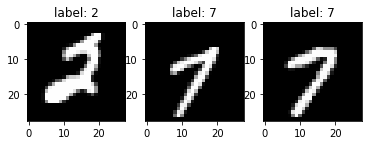

In [11]:
n = 3 # 샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(test_loader): # batch_size 만큼
    if i>5:
        break;
    
    print ("[%d]"%i)
    print ("한 번에 로드되는 데이터 크기:",len(imgs))
    
    #그리기
    for j in range(n):
        img = imgs[j].numpy() # image 타입을 numpy로 변환 (1,28,28)
        img = img.reshape((img.shape[1],img.shape[2]))
        # print img,shape
        
        plt.subplot(1,n,j+1) # (1,3) 형태 플랏의 j번째 자리에 그리겠다
        plt.imshow(img, cmap='gray')
        plt.title("label: %d" %labels[j])
    plt.show

In [12]:
#모델 선언
# * 퍼셉트론(2 hidden layer) *
model = nn.Sequential(
    nn.Linear(28*28,256),
    nn.Sigmoid(), #nn.ReLU(), nn.Sigmoid() 91.89%
    nn.Linear(256,128),
    nn.Linear(128,10),
)
#파라미터 보기
#print(list(model.parameters()))

In [13]:
#model = model.cuda()

In [14]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs,labels] in enumerate(dloader):
        img = imgs
        label = Variable(labels) #y
        #label = Variable(labels).cuda()
        # .cuda(): GPU에 로드되기 위함. 만약 CPU로 설정되어 있다면 에러남
        
        # (batch_size 1,28,28) -> (batch_size,28,28)
        img = img.reshape((img.shape[0], img.shape[2],img.shape[3]))
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img,requires_grad=False)
        
        output = imodel(img)
        _, output_index = torch.max(output,1)
        
        total += label.size(0)
        correct +=(output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [15]:
ComputeAccr(test_loader,model)

Accuracy of Test Data: 11.295573234558105


In [16]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)